<a href="https://colab.research.google.com/github/KushanChamindu/Inter-means-algorithm/blob/main/Inter_means_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys
import os
import glob
import numpy as np
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
def load_image(image_name):
  image_path ='/content/drive/MyDrive/Semester 7/Computer vision/images/image_2/' + image_name
  image = cv.imread(image_path)
  if image is None:
      sys.exit("Could not read the image.")
  return image

In [132]:
def convert2gray(img):
  r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]    ## seperate r,gb, values
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b     ## convert to gray scale based on sensivity level in human eye
  return gray

In [133]:
def get_threshold(flattern_img): 
  pixel_count = len(flattern_img)
  intensity_sum = 0
  for pixel in flattern_img:
    intensity_sum += pixel
  return intensity_sum / pixel_count

In [134]:
def partition_img_into_2(img, threshold):
  partition_1 = []
  partition_2 = []
  for row in img:
    for pixel in row:
      if pixel <= threshold:
        partition_1.append(pixel)
      else:
        partition_2.append(pixel)
  return partition_1, partition_2

In [135]:
def bouncing_detection(threshold_list, new_threshold):
  if new_threshold in threshold_list:
    if threshold_list[-1] == new_threshold:
      print("Converged !!")
      return 0                      ## optimum threshold found
    else:
      print("Bouncing detect")
      return 1                      ## pattern detect
  else:
    return -1                     ## pattern not detect but this is not optimum threshold

In [136]:
def segmentate_image(image, threshold):
  segmented_image = image.copy()
  rows_count = len(image)
  columns_count = len(image[0])
  for row_num in range(rows_count):
    for col_num in range(columns_count):
      if (image[row_num,col_num] <= threshold):
        segmented_image[row_num,col_num] = 0
      else:
        segmented_image[row_num,col_num] = 255
  return segmented_image


In [137]:
def inter_mean_algorithm(image_name):
  img = load_image(image_name)
  print("Original Image : ")
  cv2_imshow(img) 

  gray_img = convert2gray(img=img)
  print("Gray scale : ")
  cv2_imshow(gray_img) 

  flatten_img = [pixel for row in gray_img for pixel in row]

  threshold = get_threshold(flatten_img)
  print("Initial threshold - ",threshold)
  threshold_list = []
  while True:
    partition_1, partition_2 = partition_img_into_2(gray_img, threshold=threshold)
    # print('partition_1 lenght - ', len(partition_1))
    # print('partition_2 lenght - ', len(partition_2))

    mu_1 = get_threshold(partition_1)
    mu_2 = get_threshold(partition_2)

    # print("mu_1 - ", mu_1)
    # print("mu_2 - ", mu_2)

    threshold = (mu_1 + mu_2)/2
    if bouncing_detection(threshold_list, threshold) == 0:
      print("Final threshold - ", threshold)
      return gray_img,threshold
    elif bouncing_detection(threshold_list, threshold) == 1:
      return gray_img,"pattern detect"
    elif bouncing_detection(threshold_list, threshold) == -1:
      threshold_list.append(threshold)
    print("New threshold - ", threshold)

Original Image : 


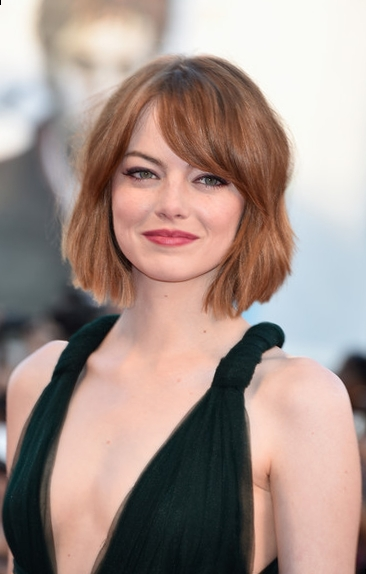

Gray scale : 


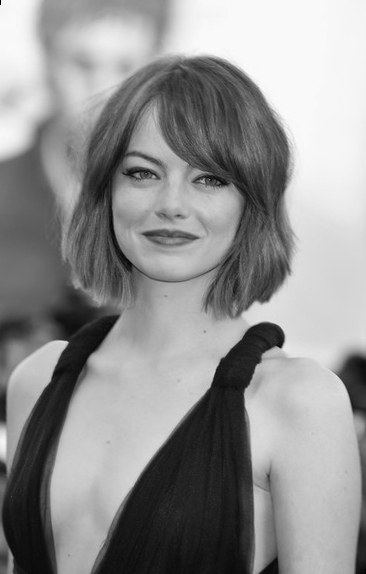

Initial threshold -  145.50793612934243
New threshold -  137.08537266269494
New threshold -  134.30746340481244
New threshold -  133.60128224389325
New threshold -  133.45805220332105
New threshold -  133.4171360470753
New threshold -  133.39997618687903
New threshold -  133.39931617720816
Converged !!
Final threshold -  133.39931617720816
Segmented image : 


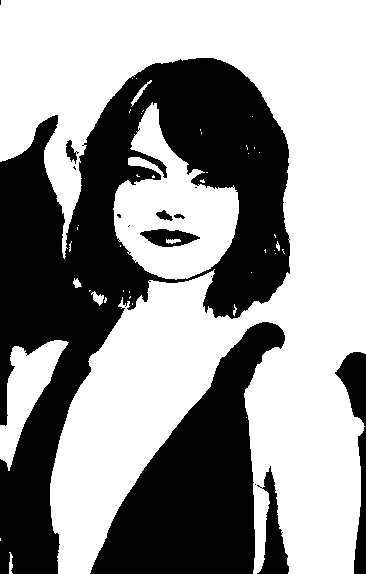

In [138]:
gray_img,threshold = inter_mean_algorithm(image_name="lady.jpg")
segmented_image = segmentate_image(image=gray_img, threshold=threshold)
print("Segmented image : ")
cv2_imshow(segmented_image) 